### MINISTRY OF TRADE
#### TRADE PATTERNS FOR IMPORT AND EXPORT (2014 - 2018)

###### SETUP

In [278]:
#SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
#import dataset
data = pd.read_excel("Data on TOP 100 EXPORT AND IMPORT  PRODUCTS (1).xlsx",sheet_name = ["EXPORT 2014","IMPORT 2014","EXPORT 2015","IMPORT 2015","EXPORT 2016", "IMPORT 2016","EXPORT 2017","IMPORT 2017","EXPORT 2018","IMPORT 2018"])

In [280]:
#pull export sheets from data
exp14 = data.get("EXPORT 2014")
exp15 = data.get("EXPORT 2015")
exp16 = data.get("EXPORT 2016")
exp17 = data.get("EXPORT 2017")
exp18 = data.get("EXPORT 2018")

In [281]:
#pull import sheets from data
imp14 = data.get("IMPORT 2014")
imp15 = data.get("IMPORT 2015")
imp16 = data.get("IMPORT 2016")
imp17 = data.get("IMPORT 2017")
imp18 = data.get("IMPORT 2018")

##### CLEANING DATA

In [282]:
def clean(df):
    # Task 1: Rename columns
    df = df.rename(columns=df.iloc[0])

    # Task 2: Exclude the first row
    df = df.iloc[1:, :]

    # Task 3: Add new columns
    df["Year"] = int(input("What year"))
    df["IMP/EXP"] = input("Import or Export")
    df = df.astype({'CUSTOM VALUE (GHS)':'int64'})
    df = df.astype({'NETWEIGHT (KGs)':'int64'})
    df["custom_val_usd"] = df['CUSTOM VALUE (GHS)']/float(input("What was the dollar rate for that year? "))

    return df

In [283]:
exp14 = clean(exp14)

What year 2014
Import or Export export
What was the dollar rate for that year?  2.21


In [284]:
exp15 = clean(exp15)

What year 2015
Import or Export export
What was the dollar rate for that year?  3.22


In [285]:
exp16 = clean(exp16)

What year 2016
Import or Export export
What was the dollar rate for that year?  3.95


In [286]:
exp17 = clean(exp17)

What year 2017
Import or Export export
What was the dollar rate for that year?  4.57


In [287]:
exp18 = clean(exp18)

What year 2018
Import or Export export
What was the dollar rate for that year?  4.80


In [288]:
imp14 = clean(imp14)

What year 2014
Import or Export import
What was the dollar rate for that year?  2.21


In [289]:
imp15 = clean(imp15)

What year 2015
Import or Export import
What was the dollar rate for that year?  3.22


In [290]:
imp16 = clean(imp16)

What year 2016
Import or Export import
What was the dollar rate for that year?  3.95


In [291]:
imp17 = clean(imp17)

What year 2017
Import or Export import
What was the dollar rate for that year?  4.57


In [292]:
imp18 = clean(imp18)

What year 2018
Import or Export import
What was the dollar rate for that year?  4.80


##### MERGE DATASETS

In [293]:
df = pd.concat([exp14,exp15,exp16,exp17,exp18,imp14,imp15,imp16,imp17,imp18], axis = 0)

In [294]:
df = df.rename(columns = {'HS CODE':"hs_code",'ITEM DESCRIPTION':"description",'CUSTOM VALUE (GHS)':"custom_val_ghs",'NETWEIGHT (KGs)':"netweight_kgs",'Year':"year","IMP/EXP":"imp_exp"})

#####  FINDING MISSING VALUES

In [295]:
df.isnull().sum()

hs_code           0
description       0
custom_val_ghs    0
netweight_kgs     0
year              0
imp_exp           0
custom_val_usd    0
dtype: int64

In [296]:
df.to_pickle("moti_all")

In [321]:
new = df.copy()

##### FURTHER CLEANING

In [322]:
new.description = new.description.str.lower()
new.description = new.description.str.strip()


In [323]:
new.hs_code = new.hs_code.str.strip()
new['hs_head'] = new.hs_code.str[:4]
new.hs_head = new.hs_head.str.replace(r'^0',"-1",regex = True)
new = new.astype({'hs_head':'int',"custom_val_ghs":"float","custom_val_usd":"float"})

In [324]:
new.sample(5)

,hs_code,description,custom_val_ghs,netweight_kgs,year,imp_exp,custom_val_usd,hs_head
74,3904100000,"polyvinyl chloride, not mixed with other subst...",131929608.0,30348832,2018,import,2.748534e+07,3904
39,1806100000,"cocoa powder, containing added sugar or other ...",54695660.0,4173182,2018,export,1.139493e+07,1806
19,4407100000,"coniferous wood sawn or chipped lengthwise, sl...",161465747.0,66211377,2015,export,5.014464e+07,4407
66,0303530000,"fish, frozen, excluding fish fillets and other...",114179148.0,44397204,2015,import,3.545936e+07,-1303
99,3917231000,of polymers of vinyl chloride for water supply,10929240.0,2150357,2014,export,4.945357e+06,3917


In [325]:
new = new.iloc[:,[0,1,2,6,3,4,5,7]]

In [302]:
# new.custom_val_ghs = new.custom_val_ghs.map('{:,}'.format)
# new.custom_val_usd = new.custom_val_usd.map('{:,}'.format)
# new.netweight_kgs  = new.netweight_kgs.map('{:,}'.format)

In [303]:
#new = new.astype({"custom_val_ghs":"float","custom_val_usd":"float"})

In [326]:
new.to_pickle('moti_clean.pkl')

In [327]:
new['hs_head'] = new['hs_head'].astype(str)

# Adjusted conditions to handle numbers with leading zeros
cond = [
    (new['hs_head'] >= '-1001') & (new['hs_head'] <= '-1599'),
    (new['hs_head'] >= '-1601') & (new['hs_head'] <= '1499'),
    (new['hs_head'] >= '1501') & (new['hs_head'] <= '1599'),
    (new['hs_head'] >= '1600') & (new['hs_head'] <= '2499'),
    (new['hs_head'] >= '2500') & (new['hs_head'] <= '2799'),
    (new['hs_head'] >= '2800') & (new['hs_head'] <= '3899'),
    (new['hs_head'] >= '3900') & (new['hs_head'] <= '4099'),
    (new['hs_head'] >= '4100') & (new['hs_head'] <= '4399'),
    (new['hs_head'] >= '4400') & (new['hs_head'] <= '4699'),
    (new['hs_head'] >= '4700') & (new['hs_head'] <= '4999'),
    (new['hs_head'] >= '5000') & (new['hs_head'] <= '6399'),
    (new['hs_head'] >= '6400') & (new['hs_head'] <= '6799'),
    (new['hs_head'] >= '6800') & (new['hs_head'] <= '7099'),
    (new['hs_head'] >= '7100') & (new['hs_head'] <= '7199'),
    (new['hs_head'] >= '7200') & (new['hs_head'] <= '8399'),
    (new['hs_head'] >= '8400') & (new['hs_head'] <= '8599'),
    (new['hs_head'] >= '8600') & (new['hs_head'] <= '8999'),
    (new['hs_head'] >= '9000') & (new['hs_head'] <= '9299'),
    (new['hs_head'] >= '9300') & (new['hs_head'] <= '9399'),
    (new['hs_head'] >= '9400') & (new['hs_head'] <= '9699'),
    (new['hs_head'] >= '9600')
]

choices = [
    'Animal & Animal Products',
    'Vegetable Products',
    'Animal or Vegetable Fats and Oils',
    'Prep. Foodstuffs',
    'Mineral Products',
    'Chemicals & Allied Ind.',
    'Plastics/Rubbers',
    'Raw Hides,Leather, & Furs',
    'Wood & Wood Products',
    'Pulp-Wood/Other Fibrous Mat.',
    'Textiles',
    'Footwear/Headgear',
    'Stone/Glass',
    'Natural or Cultured Pearls',
    'Base Metals',
    'Machinery/Electrical',
    'Transportation',
    'Precision Instruments',
    'Arms and Ammunition',
    'Misc Manufac. Articles',
    'Works of Art'
]

new['category'] = np.select(cond, choices, default="Not Found")

In [305]:
# #creating conditions where if an hs_head code falls between the range sepcified, a new column should be created with the relative category
# #or meaning of the HS CODE
# cond = [
#         (new['hs_head'] >= -1001 )& (new['hs_head'] <= -1599),
#         (new['hs_head'] >= -1601) & (new['hs_head'] <= 1499),
#         (new['hs_head'] >= 1501)  & (new['hs_head'] <= 1599),
#         (new['hs_head'] >= 1600)  & (new['hs_head'] <= 2499),
#         (new['hs_head'] >= 2500)  & (new['hs_head'] <= 2799),
#         (new['hs_head'] >= 2800)  & (new['hs_head'] <= 3899),
#         (new['hs_head'] >= 3900)  & (new['hs_head'] <= 4099),
#         (new['hs_head'] >= 4100)  & (new['hs_head'] <= 4399),
#         (new['hs_head'] >= 4400)  & (new['hs_head'] <= 4699),
#         (new['hs_head'] >= 4700)  & (new['hs_head'] <= 4999),
#         (new['hs_head'] >= 5000)  & (new['hs_head'] <= 6399),
#         (new['hs_head'] >= 6400)  & (new['hs_head'] <= 6799),
#         (new['hs_head'] >= 6800)  & (new['hs_head'] <= 7099),
#         (new['hs_head'] >= 7100)  & (new['hs_head'] <= 7199),
#         (new['hs_head'] >= 7200)  & (new['hs_head'] <= 8399),
#         (new['hs_head'] >= 8400)  & (new['hs_head'] <= 8599),
#         (new['hs_head'] >= 8600)  & (new['hs_head'] <= 8999),
#         (new['hs_head'] >= 9000)  & (new['hs_head'] <= 9299),
#         (new['hs_head'] >= 9300)  & (new['hs_head'] <= 9399),
#         (new['hs_head'] >= 9400)  & (new['hs_head'] <= 9699),
#         (new['hs_head'] >= 9600)
#        ]

# choices = ['Animal & Animal Products','Vegetable Products','Animal or Vegetable Fats and Oils','Prep. Foodstuffs','Mineral Products','Chemicals & Allied Ind.',
#           'Plastics/Rubbers','Raw Hides,Leather, & Furs','Wood & Wood Products','Pulp-Wood/Other Fibrous Mat.','Textiles','Footwear/Headgear','Stone/Glass','Natural or Cultured Pearls','Base Metals','Machinery/Electrical','Transportation','Precision Instruments',
#            'Arms and Ammunition','Misc Manufac. Articles','Works of Art']
          

# new['category'] = np.select(cond,choices,default="Not Found")

In [328]:
new.to_pickle("moti_category.pkl")

In [329]:
new.hs_head.min()

'-1206'

In [330]:
moti = new.drop(columns = "hs_head")

In [331]:
moti.to_pickle("moti_final.pkl")

In [332]:
moti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 1 to 100
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hs_code         1020 non-null   object 
 1   description     1020 non-null   object 
 2   custom_val_ghs  1020 non-null   float64
 3   custom_val_usd  1020 non-null   float64
 4   netweight_kgs   1020 non-null   int64  
 5   year            1020 non-null   int64  
 6   imp_exp         1020 non-null   object 
 7   category        1020 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 71.7+ KB


In [333]:
print(f" The dataset has {moti.shape[0]} rows and {moti.shape[1]} columns")

 The dataset has 1020 rows and 8 columns


In [334]:
moti.category.nunique()

19

In [335]:
moti[['custom_val_ghs','custom_val_usd','netweight_kgs']].describe()

,custom_val_ghs,custom_val_usd,netweight_kgs
count,1.020000e+03,1.020000e+03,1.020000e+03
mean,3.944580e+08,1.080438e+08,1.330630e+08
std,1.807456e+09,4.795147e+08,7.168082e+08
min,1.003840e+07,2.587132e+06,3.000000e+01
25%,3.795736e+07,1.042201e+07,2.387877e+06
50%,1.155234e+08,3.194208e+07,8.907287e+06
75%,2.203241e+08,6.224422e+07,3.596341e+07
max,2.484020e+10,5.795076e+09,1.060865e+10


In [336]:
moti.groupby('year').sum('custom_val_ghs')

,custom_val_ghs,custom_val_usd,netweight_kgs
year,,,
2014,6.110957e+10,2.765139e+10,23426864810
2015,7.044915e+10,2.187862e+10,25274105068
2016,7.334624e+10,1.856867e+10,39132918246
2017,9.272340e+10,2.028958e+10,22862835056
2018,1.047189e+11,2.181643e+10,25027579642


##### Custom Value Generated

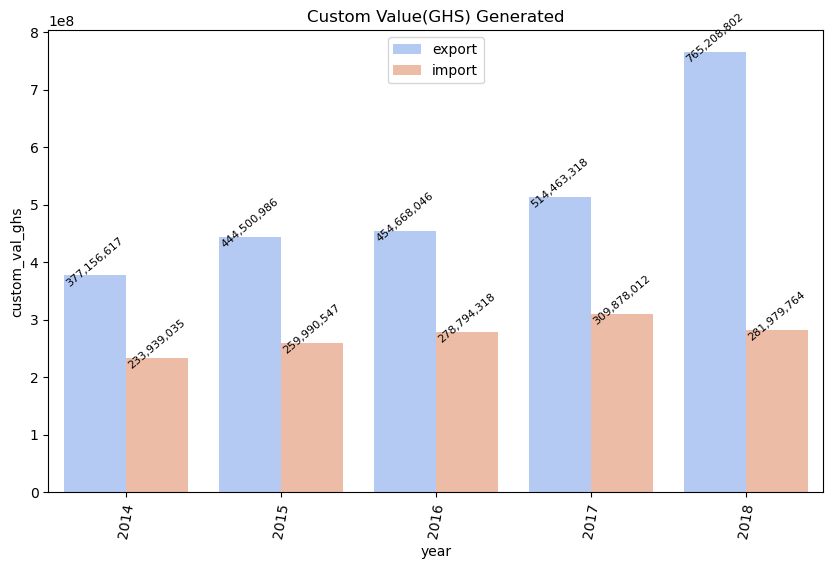

In [392]:
plt.figure(figsize=(10, 6)) 
a1 = sns.barplot(data = moti, x = 'year',y = 'custom_val_ghs', hue = 'imp_exp',errorbar = None, palette = 'coolwarm')
plt.xticks(rotation = 80)
plt.legend(loc = 'upper center')
plt.title("Custom Value(GHS) Generated")
for p in a1.patches:
    a1.annotate('{:,.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',rotation = 40,fontsize = 8)
plt.show()

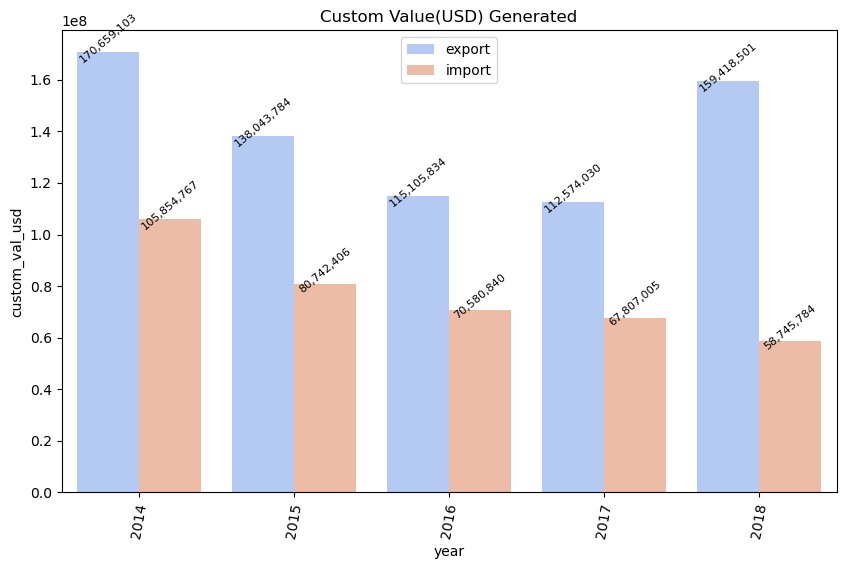

In [338]:
plt.figure(figsize=(10, 6)) 
a1 = sns.barplot(data = moti, x = 'year',y = 'custom_val_usd', hue = 'imp_exp',errorbar = None, palette = 'coolwarm')
plt.xticks(rotation = 80)
plt.legend(loc = 'upper center')
plt.title("Custom Value(USD) Generated")
for p in a1.patches:
    a1.annotate('{:,.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',rotation = 40,fontsize = 8)
plt.show()

In [401]:
expt = moti[moti.imp_exp == 'export']
expt_sort = expt.sort_values(by = 'custom_val_ghs', ascending = False).head(10)
expt_sort

,hs_code,description,custom_val_ghs,custom_val_usd,netweight_kgs,year,imp_exp,category
1,7108131000,gold bullion,2.484020e+10,5.175041e+09,171803,2018,export,Natural or Cultured Pearls
1,7108131000,gold bullion,2.468678e+10,5.401922e+09,193191,2017,export,Natural or Cultured Pearls
2,2709000000,petroleum oils and oils obtained from bitumino...,2.370278e+10,4.938079e+09,6401015619,2018,export,Mineral Products
1,7108131000,gold bullion,1.708039e+10,4.324150e+09,152097,2016,export,Natural or Cultured Pearls
2,2709000000,petroleum oils and oils obtained from bitumino...,1.597039e+10,3.494615e+09,5309671907,2017,export,Mineral Products
1,7108131000,gold bullion,1.460498e+10,4.535708e+09,121394,2015,export,Natural or Cultured Pearls
1,2709000000,petroleum oils and oils obtained from bitumino...,1.280712e+10,5.795076e+09,5083270948,2014,export,Mineral Products
2,7108131000,gold bullion,1.241677e+10,5.618447e+09,216345,2014,export,Natural or Cultured Pearls
3,1801001100,"cocoa beans, superior quality raw beans",1.093459e+10,2.278039e+09,828173832,2018,export,Prep. Foodstuffs
2,1801001100,"cocoa beans, superior quality raw beans",1.014658e+10,3.151110e+09,605771787,2015,export,Prep. Foodstuffs


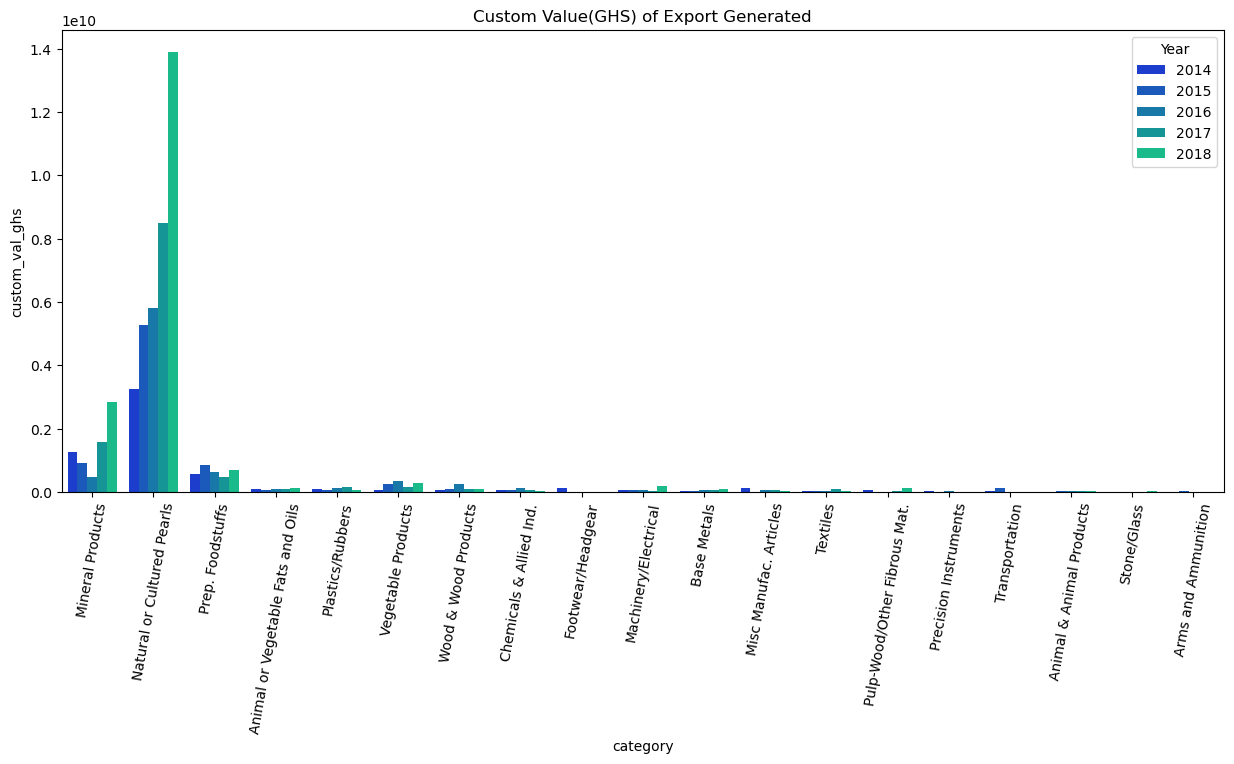

In [405]:
plt.figure(figsize=(15, 6)) 
a1 = sns.barplot(data = expt, x = 'category',y = 'custom_val_ghs', hue = 'year', palette = 'winter',errorbar = None)
plt.xticks(rotation = 80)
plt.legend(loc = 'upper right', title = 'Year')
plt.title("Custom Value(GHS) of Export Generated")
# for p in a1.patches:
#     a1.annotate('{:,.0f}'.format(p.get_height()),
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points',rotation = 40,fontsize = 8)
plt.show()

In [378]:
impt = moti[moti.imp_exp == 'import']

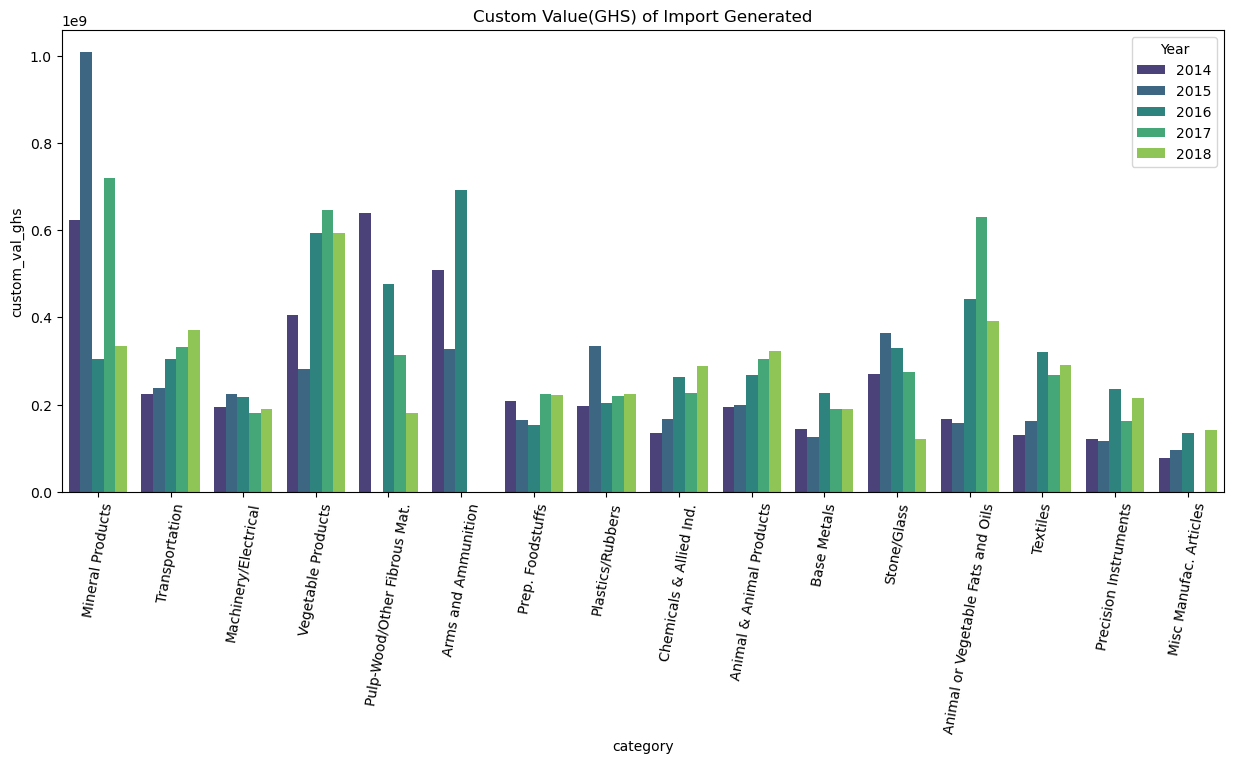

In [382]:
plt.figure(figsize=(15, 6)) 
a1 = sns.barplot(data = impt, x = 'category',y = 'custom_val_ghs', hue = 'year', palette = 'viridis',errorbar = None)
plt.xticks(rotation = 80)
plt.legend(loc = 'upper right', title = 'Year')
plt.title("Custom Value(GHS) of Import Generated")
# for p in a1.patches:
#     a1.annotate('{:,.0f}'.format(p.get_height()),
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points',rotation = 40,fontsize = 8)
plt.show()